<a href="https://colab.research.google.com/github/just1nseo/YBIGTA/blob/main/0202_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data set: kaggle <Titanic - Machine Learning from Disaster>
# https://www.kaggle.com/competitions/titanic/overview
df = pd.read_csv('/content/drive/MyDrive/2023-1 교육세션/0202 시각화/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


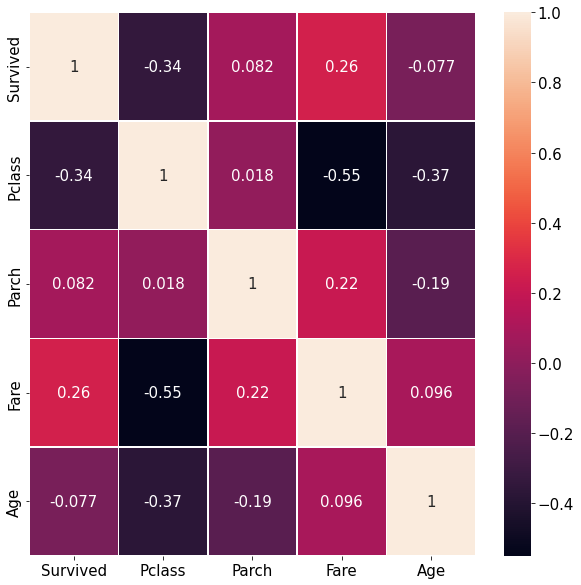

In [8]:
plt.figure(figsize=(10, 10))
plt.rc('font', size=15)
sns.heatmap(df[['Survived', 'Pclass', 'Parch', 'Fare', 'Age']].corr(), annot=True, linewidth=.6)
plt.show()

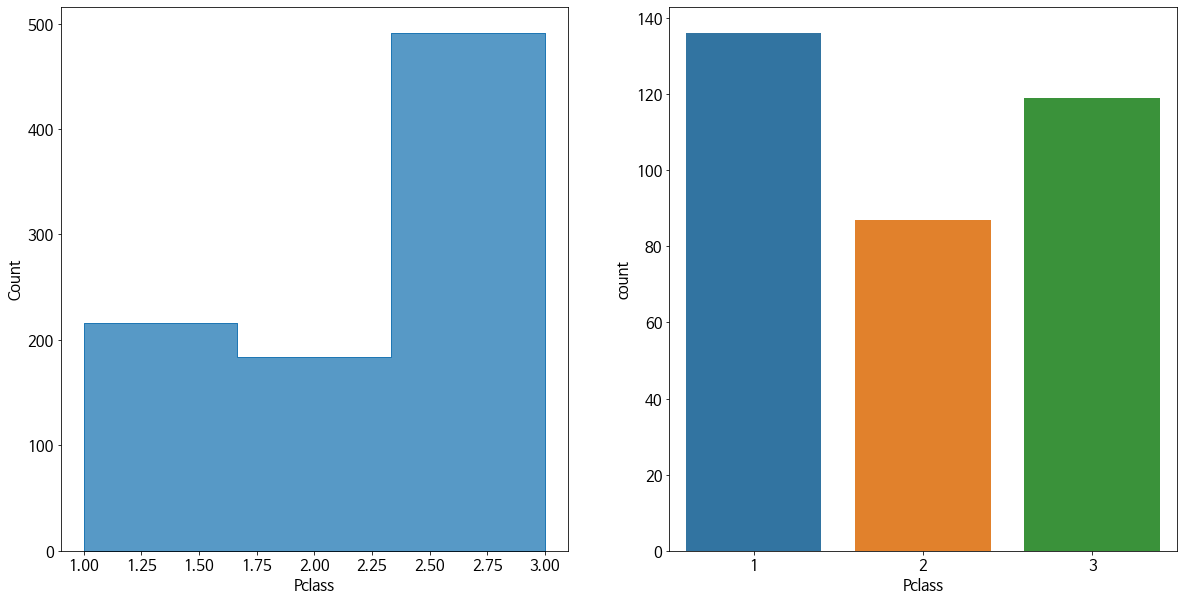

In [35]:
df_pie = df.copy()
plt.rc('font', family='NanumBarunGothic', size=15)
df_pie.Age = df_pie.Age.apply(lambda x: '클래스 1' if x < 2 else '클래스 2' if x < 3 else '클래스 3')
df_pie['count'] = 1
df_pie = df_pie[df_pie['Survived'] == 1]
df_pie = df_pie[['Pclass', 'count']].groupby('Pclass').agg(sum).reset_index()

fig, ax = plt.subplots(1,2, figsize=(20, 10))
plt.rc('font', family='NanumBarunGothic', size=15)

# Bar Chart
sns.histplot(data = df.Pclass, element='step', bins=3, ax=ax[0])
sns.barplot(data=df_pie, x='Pclass', y='count', ax=ax[1])